## Explorary Data Analysis For Cars Exhibtion
by: Amer Saleh, Naif Sulaihem <br>
Email: amersaleh.cs@gmail.com, naifsul100@gmail.com

## Appendix
* <a href=#intro>introduction</a>
* <a href=#imports>Imports</a>
* <a href=#exploreAndClean>Explore data and clean</a>
* <a href=#analysis>analysis</a>
* <a href=#visuals>visualization</a>




### <a name=#intro>introduction</a>


The history of transportation starts from the age of humans and has continued to change over some time. The first means of transportation was the human foot. The history of transport has undergone a radical change with the introduction of wheels. Existing means of transportation were continuously improved after that, for example, horse-drawn vehicles (carts or karts). Until the gas and fuel cars were invented

Cars are one of the most important necessities for every family, as they are the most popular means of transportation these days.

This project aims to analyze the used car market in the UK, compare car prices by type, engine, and car model, for example, which cars are most in demand. With the presence of more than one car company.

We will do a comprehensive analysis to find the best used cars to attract customers so that our showrooms are among the best and we can achieve the company's goal and vision for development in the used car sectors

### <a name='imports'>Imports</a>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.utils import shuffle
from pandas_profiling import ProfileReport

In [72]:
%matplotlib inline

In [3]:
# ! pip install -U pandas-profiling

###  <a name=#exploreAndClean>Explore data and clean</a>


#### Upload Data Sets
here we upload our data set, we have two data set as shown below thats for Ford and Volkeswagen.

In [4]:
df_1 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/ford.csv')# upload data of Ford csv

In [5]:
df_2 = pd.read_csv('C:/Users/imora/Documents/EDA_t5/EDA_t5/vw.csv')# upload data of Volkeswagen csv

here we merge the two data sets using shuffle from sklearn

In [6]:
data = pd.concat([df_1,df_2]).reset_index(drop = True)

In [7]:
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
#this our profile data using pandas profiling
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

now we will explore our data to find null values and incorrect values:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33122 entries, 0 to 33121
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         33122 non-null  object 
 1   year          33122 non-null  int64  
 2   price         33122 non-null  int64  
 3   transmission  33122 non-null  object 
 4   mileage       33122 non-null  int64  
 5   fuelType      33122 non-null  object 
 6   tax           33122 non-null  int64  
 7   mpg           33122 non-null  float64
 8   engineSize    33122 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.3+ MB


describe the data

In [10]:
data.describe()

year         price        mileage           tax           mpg  \
count  33122.000000  33122.000000   33122.000000  33122.000000  33122.000000   
mean    2017.044683  14366.095797   22782.077592    113.064428     56.006241   
std        2.060700   6698.673164   20266.265383     62.688154     12.043983   
min     1996.000000    495.000000       1.000000      0.000000      0.300000   
25%     2016.000000   9750.000000    8207.000000     30.000000     48.700000   
50%     2017.000000  12880.000000   17506.000000    145.000000     56.500000   
75%     2019.000000  17798.000000   31398.500000    145.000000     62.800000   
max     2060.000000  69994.000000  212000.000000    580.000000    201.800000   

         engineSize  
count  33122.000000  
mean       1.465168  
std        0.463069  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.000000  
max        5.000000

In [11]:
data.isna().sum()#thiss ccode to find sum of null values for each columns

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [12]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [13]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [14]:
data.year.unique()#we look up with unique values for years

array([2016, 2019, 2017, 2018, 2020, 2014, 2013, 2015, 2009, 2012, 2011,
       2007, 2006, 2008, 2010, 2002, 2003, 2004, 2005, 2001, 2060, 1998,
       2000, 1996], dtype=int64)

In [15]:
data[data.year > 2020].head(5)#here we need to know if there incorrect value


model  year  price transmission  mileage fuelType  tax   mpg  \
13671   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
13671         1.4

In [16]:
data.shape

(33122, 9)

In [17]:
data.loc[data['year'] > 2020]#we look for the year more than 2020

model  year  price transmission  mileage fuelType  tax   mpg  \
13671   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize  
13671         1.4

In [18]:
data.drop(data[data['year'] > 2020].index, inplace = True)#we drop all value that more than 2020

In [19]:
data.shape

(33121, 9)

In [20]:
mask1 = data[data['engineSize'] == 0.0]#we put all the dropped values to the mask, so we can do some analysis with mask1

In [21]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
1114    EcoSport  2018  11999       Manual    28000   Petrol  145  53.3   
1484          KA  2018   8135       Manual     6000   Petrol  145  57.7   
2550      Tiguan  2016  15300       Manual    38398   Diesel  145  53.3   
2768        Golf  2019  18000       Manual     5073   Petrol  145  50.4   
3177       Focus  2018  18389       Manual    19000   Petrol  145  67.3   
...          ...   ...    ...          ...      ...      ...  ...   ...   
31178     Fiesta  2014   5769       Manual    73000   Petrol    0  65.7   
31382     Fiesta  2018  14175       Manual     9000   Petrol  150  58.9   
32300      Focus  2013   8999       Manual    34000   Petrol  150  47.1   
32869      Focus  2015  14300       Manual    40457   Diesel   20  67.3   
33111     Fiesta  2017   9046       Manual    22000   Petrol    0  65.7   

       engineSize  
1114          0.0  
1484          0.0  
2550          0.0  
2768          0.0  
3177          0.0  
...           ...  
31178         0.0  
31382         0.0  
32300         0.0  
32869         0.0  
33111         0.0  

[66 rows x 9 columns]

In [22]:
data.drop(data[data['engineSize'] == 0.0].index, inplace = True)#drop all engineSize with 0.0

In [23]:
mask1

model  year  price transmission  mileage fuelType  tax   mpg  \
1114    EcoSport  2018  11999       Manual    28000   Petrol  145  53.3   
1484          KA  2018   8135       Manual     6000   Petrol  145  57.7   
2550      Tiguan  2016  15300       Manual    38398   Diesel  145  53.3   
2768        Golf  2019  18000       Manual     5073   Petrol  145  50.4   
3177       Focus  2018  18389       Manual    19000   Petrol  145  67.3   
...          ...   ...    ...          ...      ...      ...  ...   ...   
31178     Fiesta  2014   5769       Manual    73000   Petrol    0  65.7   
31382     Fiesta  2018  14175       Manual     9000   Petrol  150  58.9   
32300      Focus  2013   8999       Manual    34000   Petrol  150  47.1   
32869      Focus  2015  14300       Manual    40457   Diesel   20  67.3   
33111     Fiesta  2017   9046       Manual    22000   Petrol    0  65.7   

       engineSize  
1114          0.0  
1484          0.0  
2550          0.0  
2768          0.0  
3177          0.0  
...           ...  
31178         0.0  
31382         0.0  
32300         0.0  
32869         0.0  
33111         0.0  

[66 rows x 9 columns]

In [24]:
data['engineSize']

0        2.0
1        2.0
2        1.5
3        2.0
4        1.0
        ... 
33117    1.0
33118    1.8
33119    1.0
33120    2.0
33121    1.0
Name: engineSize, Length: 33055, dtype: float64

In [25]:
data.shape

(33055, 9)

In [26]:
data[data.mpg < 20]#we wanna look for incorrect data for mpg columns

model  year  price transmission  mileage fuelType  tax  mpg  \
14116   Golf SV  2019  17950       Manual      100   Petrol  145  0.3   

       engineSize  
14116         1.0

In [27]:
data.shape

(33055, 9)

In [28]:
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , :]

model  year  price transmission  mileage fuelType  tax   mpg  \
11041   Golf SV  2019  16995       Manual     1353   Petrol  145  47.1   
14116   Golf SV  2019  17950       Manual      100   Petrol  145   0.3   
16460   Golf SV  2019  15995       Manual     2506   Petrol  145  47.1   

       engineSize  
11041         1.0  
14116         1.0  
16460         1.0

In [29]:
#we replace 0.3 value with correct value 
data.loc[(data.year == 2019) & (data.model == " Golf SV") & (data.transmission == "Manual") & (data.engineSize == 1) , 'mpg'] = 47.1

In [30]:
#drop tax columns
data = data.drop('tax' , axis=1)

In [31]:
data

model  year  price transmission  mileage fuelType   mpg  engineSize
0       Sharan  2016  16500       Manual    35776   Diesel  56.5         2.0
1        S-MAX  2019  22489       Manual     8224   Diesel  56.5         2.0
2        C-MAX  2017  10698       Manual    31743   Diesel  68.9         1.5
3         Golf  2017  16498       Manual    39105   Petrol  47.1         2.0
4       Fiesta  2018  11750       Manual    13278   Petrol  62.8         1.0
...        ...   ...    ...          ...      ...      ...   ...         ...
33117       Up  2020  11750       Manual     5000   Petrol  51.4         1.0
33118     Polo  2017  14662       Manual    15457   Petrol  47.0         1.8
33119   Fiesta  2018   9617       Manual    37564   Petrol  56.5         1.0
33120    Focus  2018  18499       Manual    29553   Petrol  41.5         2.0
33121   Fiesta  2018  10995       Manual     3105   Petrol  65.7         1.0

[33055 rows x 8 columns]

###   <a name=#analysis>analysis</a>

In [32]:
#counts frequency year
dataY = pd.value_counts(data['year'])
dataY

2019    7851
2017    7814
2018    5502
2016    4976
2015    2514
2014    1384
2020    1303
2013     922
2012     195
2011     151
2009     122
2010     108
2008      84
2007      52
2006      29
2005      24
2004       7
2003       5
2002       4
2001       4
2000       2
1998       1
1996       1
Name: year, dtype: int64

In [33]:
#counts frequency model
dataC = pd.value_counts(data['model'])
dataC

 Fiesta                   6537
 Golf                     4860
 Focus                    4577
 Polo                     3287
 Kuga                     2224
 Tiguan                   1762
 EcoSport                 1135
 Passat                    911
 Up                        882
 T-Roc                     731
 C-MAX                     543
 Ka+                       527
 Mondeo                    525
 Touareg                   363
 B-MAX                     355
 Touran                    352
 T-Cross                   300
 S-MAX                     296
 Golf SV                   268
 Sharan                    260
 Arteon                    248
 Grand C-MAX               247
 Scirocco                  242
 Galaxy                    228
 Edge                      208
 KA                        193
 Amarok                    111
 Caravelle                 101
 CC                         95
 Tiguan Allspace            91
 Beetle                     82
 Puma                       79
 Tourneo

In [34]:
#mean price of used cars
round(data.price.mean(),2)

14369.37

In [35]:
round(data.describe(), 2)

year     price    mileage       mpg  engineSize
count  33055.00  33055.00   33055.00  33055.00    33055.00
mean    2017.04  14369.37   22787.35     56.01        1.47
std        2.05   6701.99   20272.95     12.04        0.46
min     1996.00    495.00       1.00     20.80        1.00
25%     2016.00   9750.00    8202.50     48.70        1.00
50%     2017.00  12890.00   17502.00     56.50        1.50
75%     2019.00  17799.00   31412.00     62.80        2.00
max     2020.00  69994.00  212000.00    201.80        5.00

In [36]:
#we analyze Golf data
dataGolf = data.loc[(data.model == " Golf"), :]

In [37]:
dataGolf

model  year  price transmission  mileage fuelType    mpg  engineSize
3       Golf  2017  16498       Manual    39105   Petrol   47.1         2.0
7       Golf  2019  31666    Automatic       25   Petrol   32.8         2.0
21      Golf  2015  15995       Manual    26680   Petrol   47.1         2.0
32      Golf  2016  13295       Manual    32700   Diesel   68.9         2.0
42      Golf  2017  20495    Semi-Auto    23188   Hybrid  166.2         1.4
...      ...   ...    ...          ...      ...      ...    ...         ...
33097   Golf  2019  20495       Manual     2869   Petrol   45.6         1.5
33099   Golf  2017  19798    Semi-Auto     8535   Diesel   62.8         2.0
33109   Golf  2017  19522    Automatic     9334   Diesel   57.7         2.0
33115   Golf  2015   9995       Manual    28200    Other   57.6         1.2
33116   Golf  2019  16000       Manual     4463   Petrol   48.7         1.0

[4860 rows x 8 columns]

In [38]:
sumAll= dataGolf["price"]# sum of all Golf car price
sumAll.sum()

81119540

In [39]:
yearGolf = pd.value_counts(dataGolf["year"])
yearGolf

2019    1545
2016     963
2017     874
2015     430
2018     378
2020     257
2014     218
2013     114
2012      18
2011      16
2010      14
2009      11
2008       7
2005       4
2006       3
2007       3
2004       2
2000       1
2003       1
2002       1
Name: year, dtype: int64

In [40]:
#count transmission of Golf
transGolf = pd.value_counts(dataGolf["transmission"])
transGolf

Manual       2934
Semi-Auto    1336
Automatic     590
Name: transmission, dtype: int64

In [41]:
fuelGolf = pd.value_counts(dataGolf["fuelType"])
fuelGolf

Petrol    2704
Diesel    2041
Hybrid      87
Other       28
Name: fuelType, dtype: int64

In [42]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail()

year
2016    35051.0
2017    26653.0
2018    20204.0
2019     6932.0
2020     2055.0
Name: mileage, dtype: float64

In [43]:
# try to find the mean of prices by years
meanPerYearGolf = dataGolf.groupby('year')['price'].agg(np.mean)
round(meanPerYearGolf)

year
2000     1999.0
2002     1275.0
2003    12450.0
2004     1418.0
2005     2546.0
2006     2894.0
2007     3591.0
2008     3894.0
2009     5009.0
2010     4642.0
2011     7435.0
2012     8147.0
2013     8385.0
2014    10443.0
2015    12286.0
2016    14023.0
2017    15602.0
2018    17573.0
2019    20667.0
2020    25016.0
Name: price, dtype: float64

In [44]:
dataFiesta = data.loc[(data.model == " Fiesta") , :]
dataFiesta

model  year  price transmission  mileage fuelType   mpg  engineSize
4       Fiesta  2018  11750       Manual    13278   Petrol  62.8         1.0
6       Fiesta  2016   8291       Manual    30155   Petrol  65.7         1.0
8       Fiesta  2016   7769       Manual    20525   Petrol  65.7         1.0
11      Fiesta  2018   9900       Manual    36800   Petrol  56.5         1.0
20      Fiesta  2019  15995       Manual       15   Petrol  58.9         1.0
...        ...   ...    ...          ...      ...      ...   ...         ...
33096   Fiesta  2018  12500       Manual    17793   Petrol  55.4         1.1
33106   Fiesta  2017   9500       Manual    14752   Petrol  65.7         1.0
33107   Fiesta  2015   7791       Manual    42627   Petrol  62.8         1.0
33119   Fiesta  2018   9617       Manual    37564   Petrol  56.5         1.0
33121   Fiesta  2018  10995       Manual     3105   Petrol  65.7         1.0

[6537 rows x 8 columns]

In [45]:
dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)

year
2015    31133.301811
2016    25813.323910
2017    20020.853674
2018    16428.221366
2019     7502.579694
2020     1002.000000
Name: mileage, dtype: float64

In [46]:
dataGolf.groupby('year')['price'].agg(np.mean).tail()

year
2016    14023.249221
2017    15602.494279
2018    17572.923280
2019    20666.740453
2020    25016.116732
Name: price, dtype: float64

In [47]:
dataGolf.corr()

year     price   mileage       mpg  engineSize
year        1.000000  0.700723 -0.771765 -0.248059   -0.098524
price       0.700723  1.000000 -0.669186 -0.356026    0.358566
mileage    -0.771765 -0.669186  1.000000  0.335082    0.119921
mpg        -0.248059 -0.356026  0.335082  1.000000   -0.124036
engineSize -0.098524  0.358566  0.119921 -0.124036    1.000000

### <a name=#visuals>visualization</a>

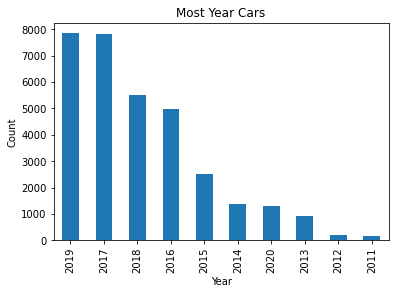

In [73]:
dataY.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Cars');

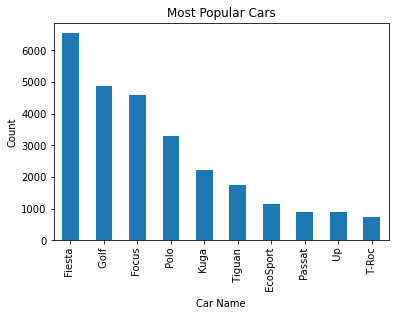

In [74]:
dataC.head(10).plot(kind='bar')
plt.xlabel("Car Name")
plt.ylabel("Count")
plt.title('Most Popular Cars');

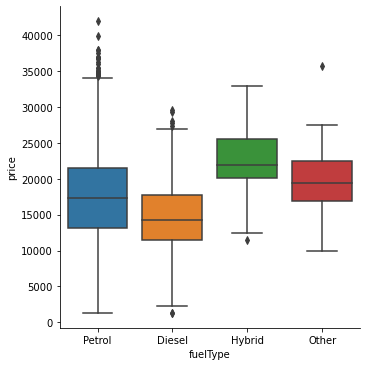

In [75]:
sns.catplot(x="fuelType", y="price", kind="box", data=dataGolf);

<Figure size 1440x1440 with 0 Axes>

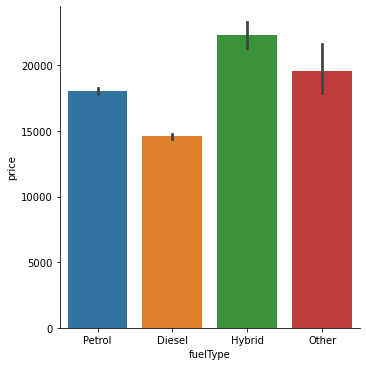

In [76]:
plt.figure(figsize=(20,20),facecolor='w')
sns.catplot(x="fuelType", y="price",kind="bar", data=dataGolf);

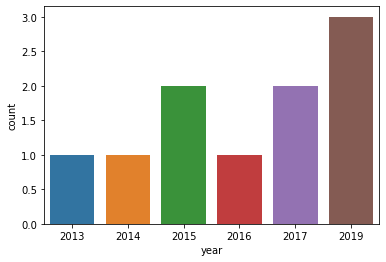

In [77]:
sns.countplot(x="year", data=dataGolf.head(10));

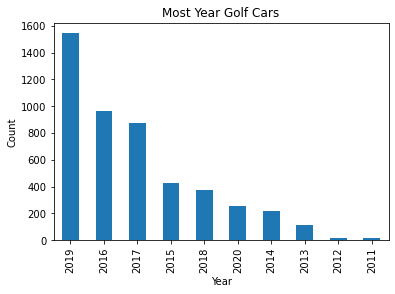

In [78]:
yearGolf.head(10).plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Most Year Golf Cars');

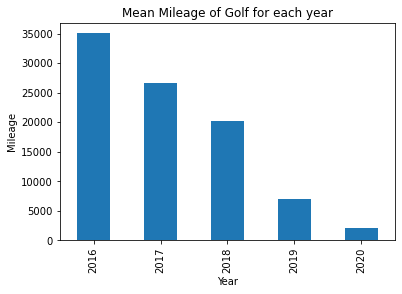

In [79]:
round(dataGolf.groupby('year')['mileage'].agg(np.mean)).tail(5).plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean Mileage of Golf for each year');

C:\Users\imora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


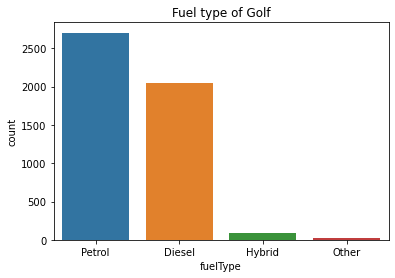

In [80]:
sns.countplot(dataGolf["fuelType"]);
plt.title("Fuel type of Golf");

<AxesSubplot:xlabel='year', ylabel='price'>

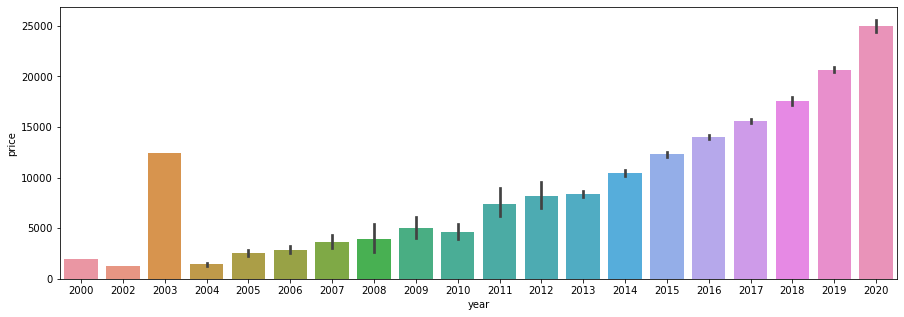

In [81]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = dataGolf["year"], y = dataGolf["price"])

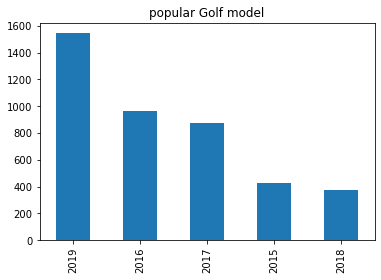

In [82]:
yearGolf.head(5).plot(kind='bar')
plt.title('popular Golf model');

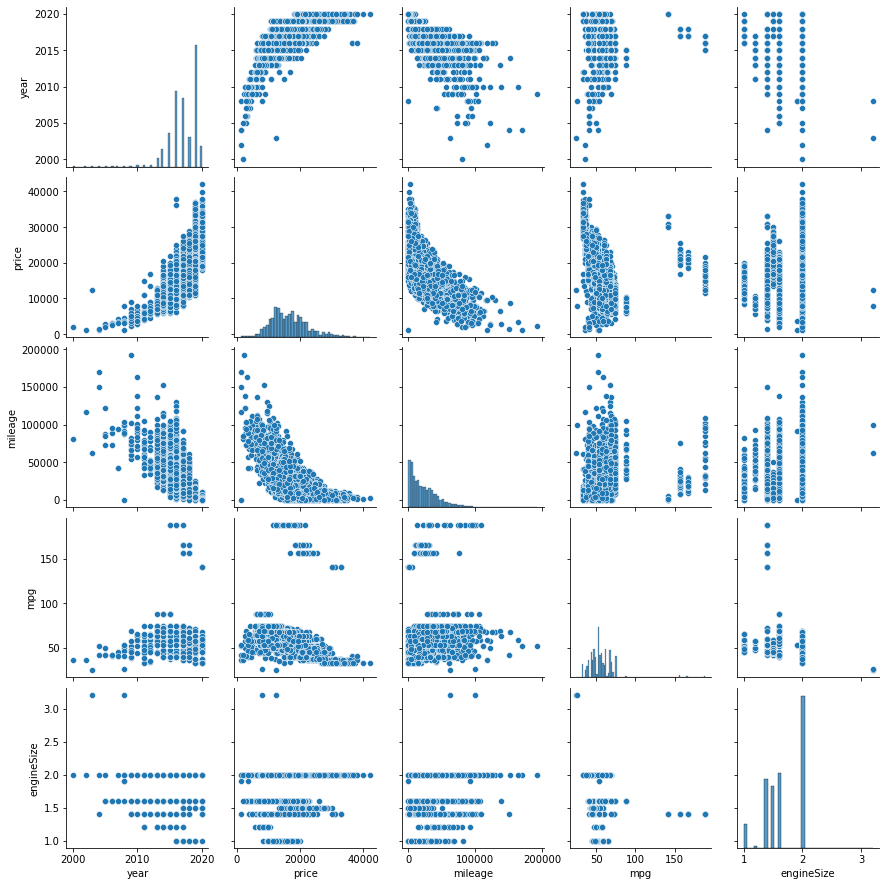

In [83]:
sns.pairplot(dataGolf)

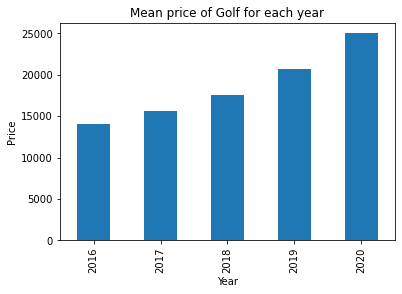

In [84]:
round(dataGolf.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Golf for each year');

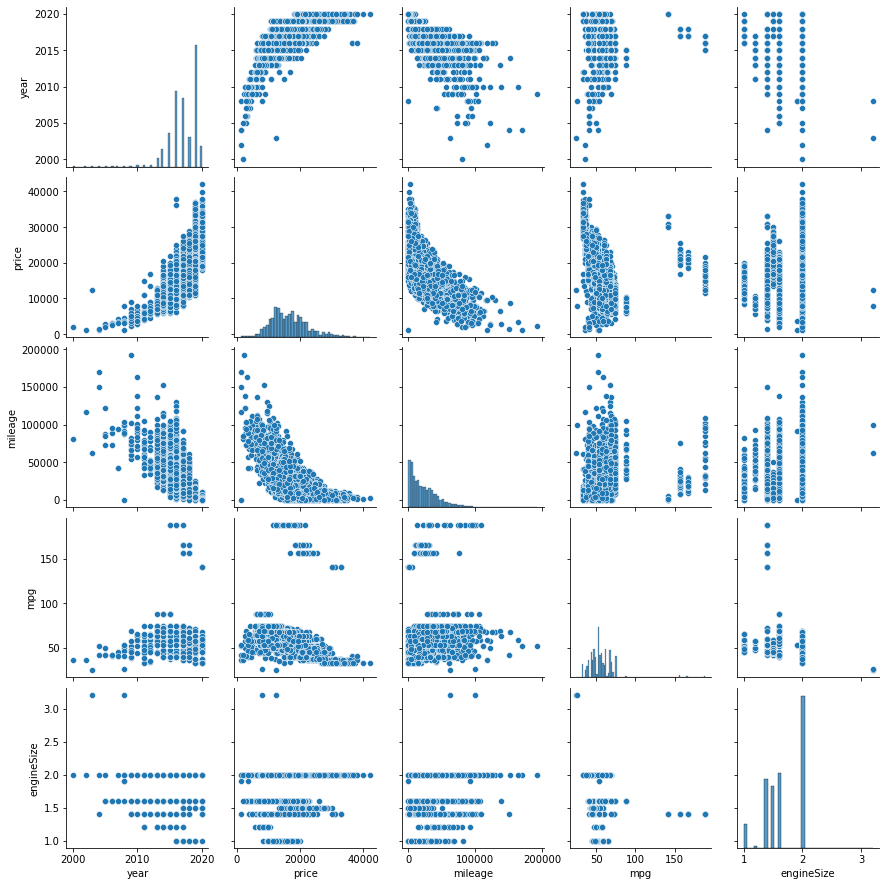

In [85]:
sns.pairplot(data=dataGolf);

what is the correlation between price and year, price and mileage ?

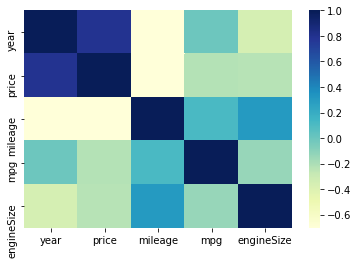

In [86]:
sns.heatmap(dataFiesta.corr(),cmap="YlGnBu");#there is no correlation between price and mileage for customers, as we can see there is a correlation between price and year

C:\Users\imora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


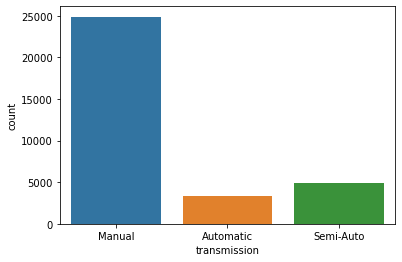

In [87]:
sns.countplot(data["transmission"]);

C:\Users\imora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


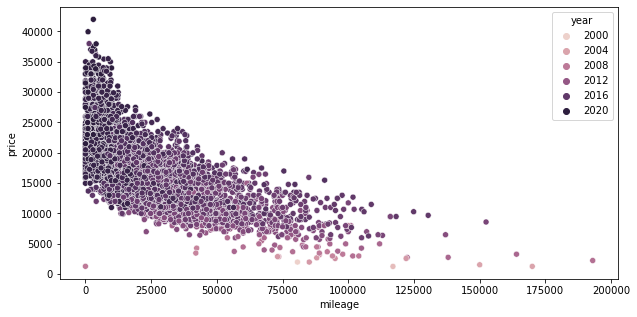

In [88]:
plt.figure(figsize=(10,5),facecolor='w')
sns.scatterplot(dataGolf["mileage"], dataGolf["price"], hue = dataGolf["year"]);


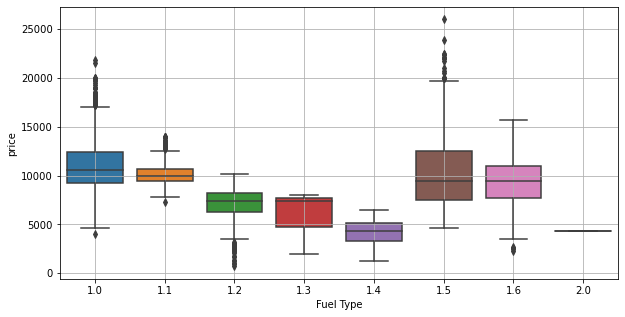

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(x='engineSize',y='price',data=dataFiesta)
plt.xlabel("Fuel Type")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

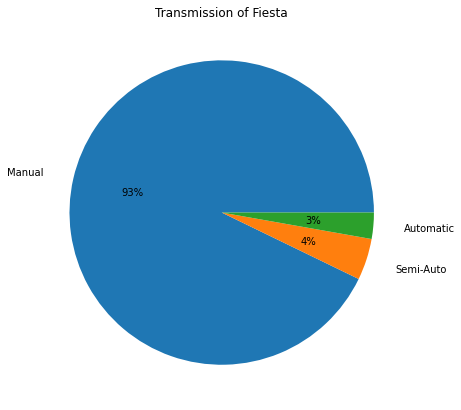

In [90]:
plt.figure(figsize=(7,7))
plt.pie(pd.value_counts(dataFiesta["transmission"]), labels=['Manual', 'Semi-Auto', 'Automatic'], autopct='%1.0f%%', labeldistance=1.2)
plt.title("Transmission of Fiesta");

C:\Users\imora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


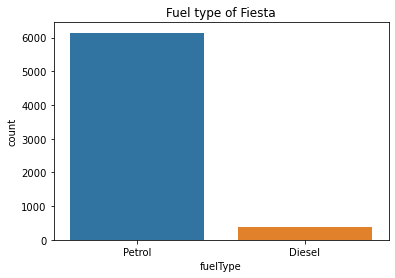

In [91]:
sns.countplot(dataFiesta["fuelType"]);
plt.title("Fuel type of Fiesta");

In [92]:
dataFiesta.groupby('year')['price'].agg(np.mean).tail()

year
2016     8766.722026
2017     9717.969968
2018    11270.377753
2019    14371.770742
2020    16688.235294
Name: price, dtype: float64

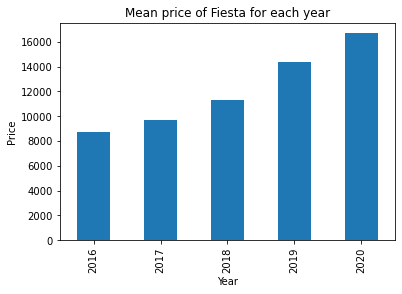

In [93]:
round(dataFiesta.groupby('year')['price'].agg(np.mean).tail()).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Mean price of Fiesta for each year');

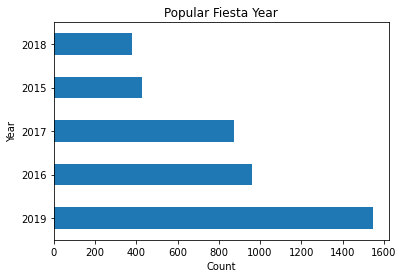

In [94]:
yearGolf.head(5).plot(kind='barh')
plt.title('Popular Fiesta Year')
plt.xlabel("Count")
plt.ylabel("Year");

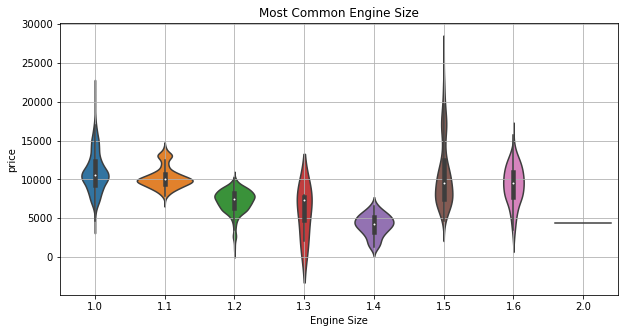

In [95]:
plt.figure(figsize=(10,5))
sns.violinplot(x='engineSize',y='price',data=dataFiesta)
plt.title("Most Common Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("price")
plt.xticks(rotation=0)
plt.grid(True)
plt.show();

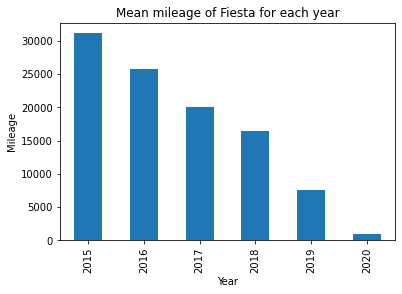

In [96]:
round(dataFiesta.groupby('year')['mileage'].agg(np.mean).tail(6)).plot(kind="bar");
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title('Mean mileage of Fiesta for each year');